# Quick start demo

First, let's familiarize with the core data classes --- Document, Layers, and Entities.

In [1]:
from papermage.magelib import Document

doc = Document("This is a sentence. This is another sentence.")

In [2]:
doc.symbols

'This is a sentence. This is another sentence.'

But documents are highly-structured 

## Using Recipes to get Documents

Documents are annoying to build from scratch. But we don't have to! Let's use a predefined recipe:

In [2]:
import os
import pathlib
from papermage.recipes import CoreRecipe
from IPython import get_ipython

pwd = os.path.abspath(get_ipython().run_line_magic("pwd", ""))
fixture_path = pathlib.Path(pwd).parent / "tests/fixtures"

recipe = CoreRecipe()
doc = recipe.run(fixture_path / "2304.02623v1.pdf")

/Users/kylel/miniconda3/envs/papermage/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/kylel/miniconda3/envs/papermage/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator OneHotEncoder from version 1.2.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/kylel/miniconda3/envs/papermage/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MaxAbsScaler from version 1.2.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stabl

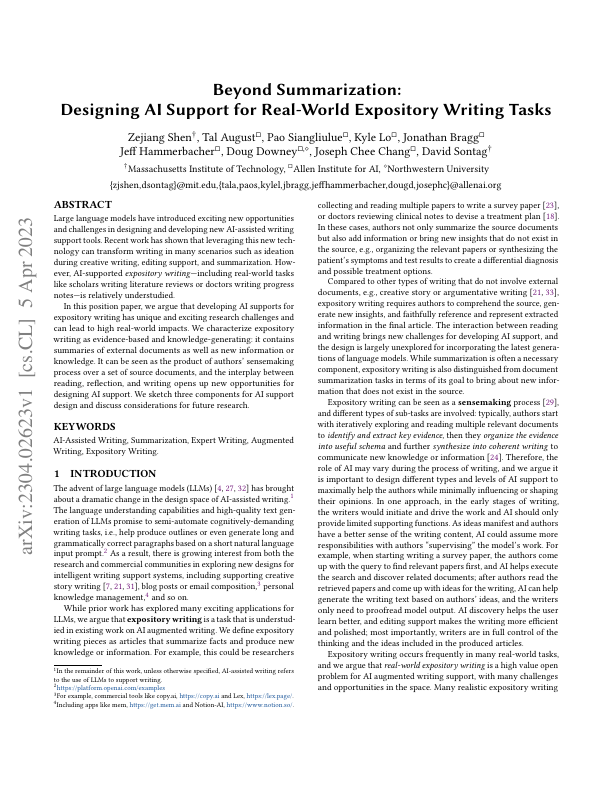

In [4]:
doc.pages[0].images[0]